## VISUALIZATION FILE

In [3]:
!pip install torch

In [26]:
!pip show torch

Name: torch
Version: 2.5.1
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3-Clause
Location: c:\users\pedro\anaconda3\envs\env_mia\lib\site-packages
Requires: filelock, fsspec, jinja2, networkx, sympy, typing-extensions
Required-by: 


In [5]:
!conda search torch

Loading channels: ...working... done
No match found for: torch. Search: *torch*
# Name                       Version           Build  Channel             
_pytorch_select                  0.1           cpu_0  pkgs/main           
_pytorch_select                  0.2           gpu_0  pkgs/main           
_pytorch_select                1.1.0             cpu  pkgs/main           
_pytorch_select                1.2.0             gpu  pkgs/main           
diffusers-torch               0.18.2 py310h9909e9c_0  pkgs/main           
diffusers-torch               0.18.2 py311h746a85d_0  pkgs/main           
diffusers-torch               0.18.2 py312hfc267ef_0  pkgs/main           
diffusers-torch               0.18.2  py38h9909e9c_0  pkgs/main           
diffusers-torch               0.18.2  py39h9909e9c_0  pkgs/main           
diffusers-torch               0.30.3 py310haa95532_0  pkgs/main           
diffusers-torch               0.30.3 py311haa95532_0  pkgs/main           
diffusers-torch     

In [19]:
!conda search cuda

Loading channels: ...working... done
# Name                       Version           Build  Channel             
cuda                          12.4.1      h382c6e5_0  pkgs/main           
cuda                          12.4.1      hb982923_0  pkgs/main           


In [18]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Wed_Nov_22_10:30:42_Pacific_Standard_Time_2023
Cuda compilation tools, release 12.3, V12.3.107
Build cuda_12.3.r12.3/compiler.33567101_0


In [3]:
print(torch.version.cuda)
print(torch.__version__)
print(torch.cuda.is_available())

12.1
2.1.2+cu121
True


In [27]:
!conda install pytorch pytorch-cuda=12.4 -c pytorch -c nvidia

^C


---

In [1]:
## VISUALIZATION FILE

import scipy.io
from scipy import signal
import matplotlib.pyplot as plt
import torch
import numpy as np

SOURCEFOLDER = "D:\\Universidade\\DTU 1A 2S fall\\BCI\\SSVEP-BCI-Data\\SSVEP-BCI-Data\\"

C:\Users\Pedro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [7]:
## LOAD
mat = scipy.io.loadmat(SOURCEFOLDER + 'S1.mat')
S1_data = mat["data"] 

In [10]:
## “Electrode index”, “Time points”, “Target index”, and “Block index”

print(mat.keys())

print(mat["__header__"])
print(mat["__version__"])
print(mat["__globals__"])
#print(mat["data"])

print(S1_data.shape)
type(S1_data)

dict_keys(['__header__', '__version__', '__globals__', 'data'])
b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Mon Mar 21 10:13:25 2016'
1.0
[]
(64, 1500, 40, 6)


numpy.ndarray

In [16]:
S1_data[0,0,:,0]
#S1_data[0,0,0,0]

array([-30.3335762 ,  12.21168709, -36.1557045 , -18.95798492,
       -14.26686096,  21.23764038,  -2.67509222,   1.06250477,
        30.63693619, -30.06965446,  12.82508183, -14.5942421 ,
       -10.73283958,  -6.57371044, -17.77108002, -34.81800842,
       -12.32066631, -22.91991425,  13.23920059,  -3.37003493,
        -0.97902858, -14.82035446,   5.13964033,  -9.5411911 ,
        10.23405838,  -5.74013519, -24.37192535,   7.51819181,
        86.00876617, -18.83477211,  -8.2235136 ,  22.87558174,
       -31.39519119, -10.26593685, -13.15928268, -25.24019623,
       -35.8962326 ,  17.72022438,   7.29934502, -21.64048958])

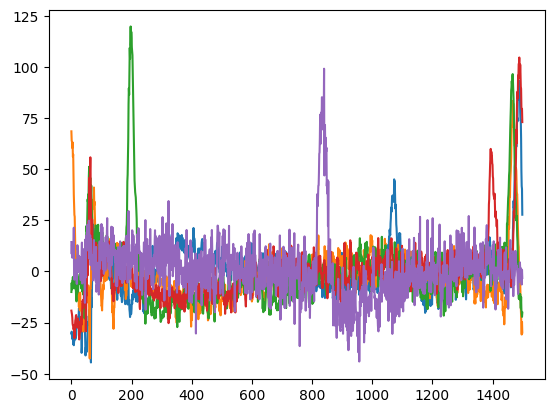

In [23]:
import matplotlib.pyplot as plt

plt.plot(np.arange(0, 1500), S1_data[0,:,0,0])
plt.plot(np.arange(0, 1500), S1_data[0,:,0,1])
plt.plot(np.arange(0, 1500), S1_data[0,:,0,2])
plt.plot(np.arange(0, 1500), S1_data[0,:,0,3])
plt.plot(np.arange(0, 1500), S1_data[0,:,0,4])
plt.show()

In [66]:
with open(SOURCEFOLDER + '64-channel_locations.txt') as file:
    datatable = [line.split() for line in file.read().splitlines() if line!=""]
    datatable = np.array(datatable)

#datatable

In [67]:
with open(SOURCEFOLDER + 'subject_info_35_dataSets.txt') as file:
    # print([line for line in file.read().splitlines() if line!=""])
    #datatable1 = [line.split() for line in file.read().splitlines() if line!=null]
    datatable1 = [line.split() for line in file.read().splitlines()]

    #datatable1 = [datatable1[0]] + datatable1[2:]
    datatable1 = datatable1[2:]

    datatable1 = np.array(datatable1)

#datatable1

(1125,)


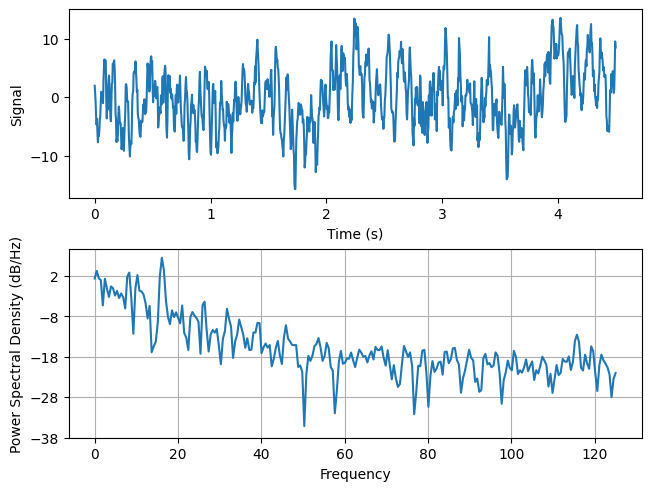

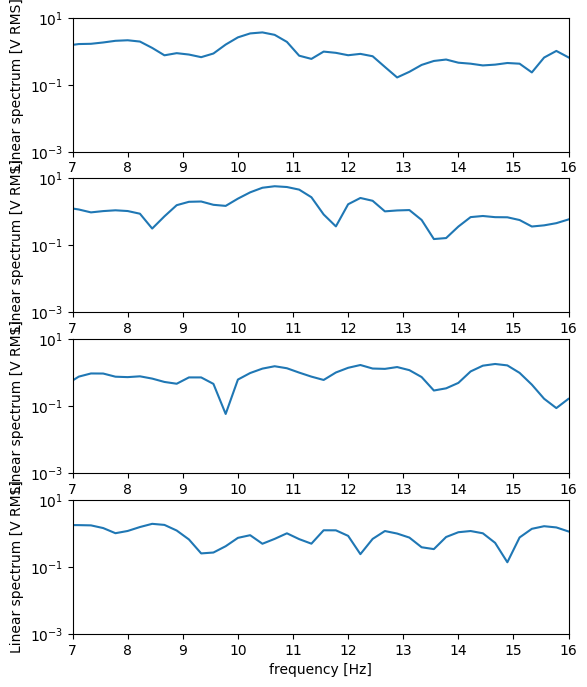

In [98]:


def plotPeriodogram(data, frequency, ax):
    f, Pxx_spec = signal.periodogram(data, frequency, 'flattop', scaling='spectrum')
    
    ax.semilogy(f, np.sqrt(Pxx_spec))
    ax.set_ylim([1e-3, 1e1])
    ax.set_xlim([7, 16]) ## TIRAR!!
    ax.set_xlabel('frequency [Hz]')
    ax.set_ylabel('Linear spectrum [V RMS]')


def plotPSD(data, frequency):
    dt = 1/frequency
    print(data.shape)
    t = np.arange(0, data.shape[0]/frequency, dt)
    #nse = np.random.randn(len(t))
    #r = np.exp(-t / 0.05)

    #cnse = np.convolve(nse, r) * dt
    #cnse = cnse[:len(t)]
    #s = 0.1 * np.sin(2 * np.pi * t) + cnse
    s = data

    fig, (ax0, ax1) = plt.subplots(2, 1, layout='constrained')
    ax0.plot(t, s)
    ax0.set_xlabel('Time (s)')
    ax0.set_ylabel('Signal')
    #ax1.psd(s, NFFT=512, Fs=1 / dt)
    ax1.psd(s, NFFT=512, Fs=1 / dt)

    plt.show()


plotPSD(S1_data[55,125:1250,0,0], 250)


fig, axs = plt.subplots(4,)
fig.set_figheight(8)

plotPeriodogram(S1_data[61,125:1250,0,0], 250, axs[0])
plotPeriodogram(S1_data[61,125:1250,20,0], 250, axs[1])
plotPeriodogram(S1_data[61,125:1250,30,0], 250, axs[2])
plotPeriodogram(S1_data[61,125:1250,39,0], 250, axs[3])
plt.show()

In [ ]:

## EXTRACT INFO FOR TRIAL
def extractFeatures1(electrodeIndex, data):
    pass

## CNN #1

In [93]:
m = torch.nn.Conv1d(16, 32, 3, stride=1, padding=1)
input = torch.randn(20, 16, 50)
output = m(input)
print(input.size())
print(output.size())

torch.Size([20, 16, 50])
torch.Size([20, 32, 50])


In [4]:
## SETUP DATASET
from torch.utils.data import TensorDataset, DataLoader
import torch.utils.data as data_utils


train = data_utils.TensorDataset(features, targets)
train_loader = data_utils.DataLoader(train, batch_size=50, shuffle=True)


NameError: name 'features' is not defined

In [17]:
# Define relevant variables for the ML task
batch_size = 64
num_classes = 40
learning_rate = 0.001
num_epochs = 20

# Device will determine whether to run the training on GPU or CPU.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


### MODELS

In [34]:
from torch import nn

print1Q = False

# Creating a CNN class
class ConvNeuralNet(nn.Module):
#  Determine what layers and their order in CNN object 
    def __init__(self, num_classes, N_channels):
        super(ConvNeuralNet, self).__init__()
        timeConv_kernelsize  = 25
        spaceConv_kernelsize = 64
        spacePool_kernelsize = 25
        linear_middle_layersize  = 160
        N_channels = 20

        self.conv_layerTime  = nn.Conv2d(1,          N_channels, kernel_size=(1,timeConv_kernelsize), stride=1, padding=(0,(timeConv_kernelsize-1)//2))
        self.conv_layerSpace = nn.Conv2d(N_channels, N_channels, kernel_size=(64,1), stride=1)
        self.batchnorm1 = nn.BatchNorm2d(N_channels) 
        self.max_pool1 = nn.MaxPool2d(kernel_size = (1,25), stride = (1,25)) # , stride = (0,25)
        
        #self.conv_layer3 = nn.Conv2d(in_channels=N_channels, out_channels=N_channels*2, kernel_size=(1,30))
        #self.conv_layer4 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3)
        #self.max_pool2 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        
        #self.fc1 = nn.Linear((1500//25+1)*20, 80)
        #self.fc1 = nn.Linear((1500//25)*20, 80)
        self.fc1 = nn.Linear((1250//25)*N_channels, 160)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(160, num_classes)
        self.softmax1 = nn.Softmax()
    
    # Progresses data across layers    
    def forward(self, x):
        x = x.unsqueeze(1) # Add channel dimension: [batch, 1, 64, 1500]
        out = self.conv_layerTime(x)
        if(print1Q): print(out.shape)
        out = self.conv_layerSpace(out)
        if(print1Q): print(out.shape)
        out = self.batchnorm1(out)
        if(print1Q): print(out.shape)
        out = self.max_pool1(out)
        if(print1Q): print(out.shape)
        
        out = out.reshape(out.size(0), -1)
        if(print1Q): print(out.shape)
        
        out = self.fc1(out)
        if(print1Q): print(out.shape)
        out = self.relu1(out)
        if(print1Q): print(out.shape)
        out = self.fc2(out)
        if(print1Q): print(out.shape)
        out = self.softmax1(out)
        if(print1Q): print(out.shape)
        return out

In [39]:
from torch import nn

print1Q = False
#print1Q = True

# Creating a CNN class
class ConvNeuralNet2(nn.Module):
#  Determine what layers and their order in CNN object 
    def __init__(self, num_classes):
        super(ConvNeuralNet2, self).__init__()
        timeConv_kernelsize  = 25*2 ##chat suggested 50
        spaceConv_kernelsize = 64
        spacePool_kernelsize = 25
        linear_middle_layersize  = 160
        N_channels = 20

        # Temporal Convolution
        self.time_conv = nn.Sequential(
            nn.Conv2d(1, N_channels, kernel_size=(1, timeConv_kernelsize), stride=(1, 1), padding=(0, timeConv_kernelsize//2)),  # Temporal filtering
            #nn.BatchNorm2d(N_channels),
            nn.ReLU(),
            ##nn.MaxPool2d(kernel_size=(1, 2))
            #nn.MaxPool2d(kernel_size = (1,2), stride = (1,2))
            nn.MaxPool2d(kernel_size = (1,5), stride = (1,5), padding=(0,2))
        )


        # Spatial Convolution
        self.space_conv = nn.Sequential(
            nn.Conv2d(N_channels, N_channels*2, kernel_size=(64, 1), stride=(1, 1)),  # Spatial filtering
            #nn.BatchNorm2d(N_channels*2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = (1,5), stride = (1,5), padding=(0,2))
        )
        
        
        # Fully Connected Layers
        self.fc = nn.Sequential(
            nn.MaxPool2d(kernel_size = (1,10), stride = (1,10)),
            nn.Flatten(),
            #n.Linear(N_channels*2 * 1 * 1250//4//4//10 - N_channels + 10, 128),  # Adjust based on input size
            #nn.Linear(N_channels*2 * 1250//3//3//10 , 128),  # Adjust based on input size
            nn.Linear(N_channels*2 * 1250//25//10 , 128),  # Adjust based on input size
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, num_classes)
        )

    
    # Progresses data across layers    
    def forward(self, x):
        if(print1Q): print("input, ", x.shape)
        x = x.unsqueeze(1) # Add channel dimension: [batch, 1, 64, 1500]
        if(print1Q): print("input, ", x.shape)
        x = self.time_conv(x)
        if(print1Q): print(x.shape)
        x = self.space_conv(x)
        if(print1Q): print(x.shape)
        x = self.fc(x)
        if(print1Q): print(x.shape)
        return x

In [81]:
from torch import nn

print1Q = False
#print1Q = True

# Creating a CNN class
class ShallowConvNet(nn.Module):
#  Determine what layers and their order in CNN object 
    def __init__(self, num_classes=40, C=64, T=1250, F1=8, D=2, F2=16, dropout_prob=0.5):
        """
        Args:
            num_classes: Number of output classes (default=40).
            C: Number of EEG channels (default=64).
            T: Number of time points (default=1250).
            F1: Number of temporal filters (default=8).
            D: Depth multiplier for depthwise conv (default=2).
            F2: Number of separable spatial filters (default=16).
            dropout_prob: Dropout probability (default=0.5).
        """
        super(ShallowConvNet, self).__init__()

        # Block 1: Temporal Convolution
        self.block1 = nn.Sequential(
            nn.Conv2d(1, F1, kernel_size=(1, 64), padding='same', bias=False),  # Temporal Conv
            nn.BatchNorm2d(F1),
            nn.Conv2d(F1, F1 * D, kernel_size=(C, 1), bias=False, groups=D),
            nn.BatchNorm2d(F1 * D),
            nn.ELU(),
            nn.AvgPool2d(kernel_size=(1, 4)),
            nn.Dropout(p=dropout_prob)
        )
        
        # Block 2: Separable Convolution
        self.block2 = nn.Sequential(
            nn.Conv2d(F1 * D, F2, kernel_size=(1, 16), padding='same', bias=False),  # Depthwise Separable Conv
            nn.BatchNorm2d(F2),
            nn.ELU(),
            nn.AvgPool2d(kernel_size=(1, 8)),
            nn.Dropout(p=dropout_prob)
        )
        
        # Fully Connected Layer
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(F2 * (T // 32), num_classes),  # Adjust based on the pooling
            nn.Softmax(dim=1)
        )

    
    # Progresses data across layers    
    def forward(self, x):
        if(print1Q): print("input, ", x.shape)
        x = x.unsqueeze(1) # Add channel dimension: [batch, 1, 64, 1500]
        if(print1Q): print("input2, ", x.shape)
        x = self.block1(x)
        if(print1Q): print(x.shape)
        x = self.block2(x)
        if(print1Q): print(x.shape)
        x = self.fc(x)
        if(print1Q): print(x.shape)
        return x

## Torch - chat


In [53]:
import os
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from scipy.io import loadmat

class EEGDataset(Dataset):
    def __init__(self, data_dir):
        """
        Initialize the dataset by loading and preprocessing EEG data.

        Args:
        - data_dir: Path to the directory containing .mat files.
        """
        self.data = []
        self.labels = []
        self._load_data(data_dir)
    
    def _load_data(self, data_dir):
        """
        Load and preprocess EEG data from .mat files.

        Args:
        - data_dir: Directory containing .mat files.
        """
        n_subjects = 2 ##NUMBER OF SUBJECTS TO USE <40
        i_subj = 0
        for file in os.listdir(data_dir):
            if file.endswith(".mat"):
                mat_data = loadmat(os.path.join(data_dir, file))
                eeg_data = mat_data['data']  # Adjust key based on your .mat file
                # eeg_data shape: [64, 1500, 40, 6]
                ## CROP
                eeg_data = eeg_data[:,124:1500-125-1,:,:]
                
                num_electrodes, num_timepoints, num_classes, num_blocks = eeg_data.shape
                
                # Reshape into trials: [num_classes * num_blocks, 64, 1500]
                for block in range(num_blocks):
                    for target in range(num_classes):
                        trial = eeg_data[:, :, target, block]
                        self.data.append(trial)
                        self.labels.append(target)
            i_subj += 1
            if(i_subj >= n_subjects):
                break
        
        # Convert lists to numpy arrays for PyTorch compatibility
        self.data = np.array(self.data)  # Shape: [num_trials, 64, 1500]
        self.labels = np.array(self.labels)  # Shape: [num_trials]

    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        """
            Return a single data-label pair.

            Args:
            - idx: Index of the trial.

            Returns:
            - trial: EEG trial data as a PyTorch tensor.
            - label: Target class as a PyTorch tensor.
        """
        trial = torch.tensor(self.data[idx], dtype=torch.float32)  # Shape: [64, 1500]
        label = torch.tensor(self.labels[idx], dtype=torch.long)
        return trial, label

# Example usage:
data_dir = SOURCEFOLDER + "data"
eeg_dataset = EEGDataset(data_dir)
##eeg_dataloader = DataLoader(eeg_dataset, batch_size=32, shuffle=True) ## IGINORAR



In [54]:
## TEST TRAIN SPLIT
from torch.utils.data import random_split

total_samples = len(eeg_dataset)
print(f"Total samples in the dataset: {total_samples}")

# Define split ratios
train_ratio = 0.8
test_ratio = 0.2

# Compute sizes
train_size = int(train_ratio * total_samples)
test_size = total_samples - train_size

# Randomly split the dataset
train_dataset, test_dataset = random_split(eeg_dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)
print(f"Total samples in the train dataset: {len(train_dataset)}")
print(f"Total samples in the test dataset:  {len(test_dataset)}")


Total samples in the dataset: 480
Total samples in the train dataset: 384
Total samples in the test dataset:  96


In [5]:
def evaluate(model, test_loader):
    model.eval()  # Set model to evaluation mode
    correct = 0
    total = 0
    with torch.no_grad():  # No gradients needed for evaluation
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)  # Move to GPU
            
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)  # Get predicted class
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    return accuracy

In [88]:
## TRAINING LOOP
import torch.optim as optim

# Device will determine whether to run the training on GPU or CPU.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Device: {device}")

# Initialize model, loss, and optimizer
#model = ConvNeuralNet(num_classes=40, N_channels=20).to(device) # 40
#model = ConvNeuralNet2(num_classes=40).to(device) # 40
model = ShallowConvNet(num_classes=40, F1=16, D=4, F2=32 ).to(device) # 40
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Training loop
num_epochs = 5 #10
loss_list  = []
accu_list  = []
train_accu_list = []
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    #for inputs, labels in eeg_dataloader:
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)  # Move to GPU
        optimizer.zero_grad()
        if(print1Q): print(inputs.shape)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    loss_list += [running_loss / len(train_loader)]
    accu_list += [evaluate(model, test_loader)]
    train_accu_list += [evaluate(model, train_loader)]
    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {running_loss / len(train_loader):.3f} | Training Accuracy: {train_accu_list[-1]:.3f}% | Validation Accuracy: {accu_list[-1]:.3f}%")

Device: cuda


KeyboardInterrupt: 

In [83]:
len(eeg_dataset)

480

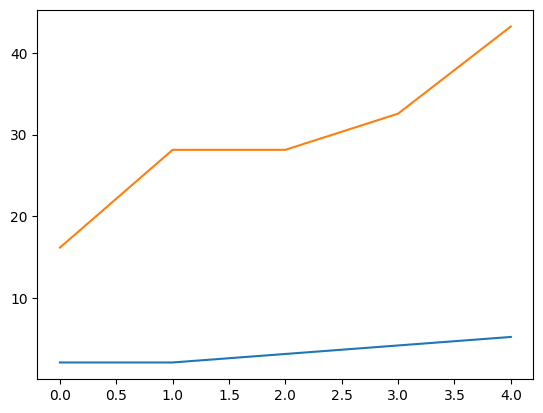

In [84]:
plt.Figure()
plt.plot(accu_list)
plt.plot(train_accu_list)
plt.show()

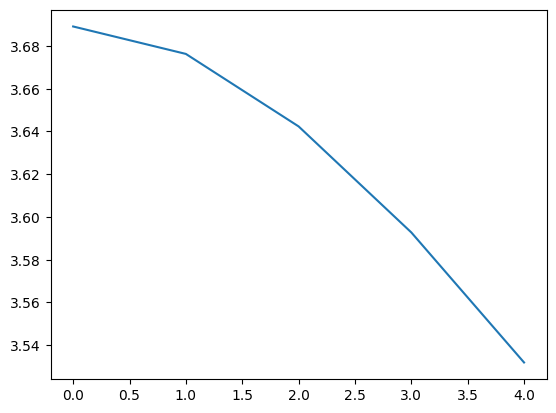

In [85]:
plt.Figure()
plt.plot(loss_list)
plt.show()

In [86]:
pytorch_total_params = sum(p.numel() for p in model.parameters())
pytorch_train_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

print(pytorch_total_params)
#print(pytorch_train_params)

33784


In [89]:
from torchsummary import summary

summary(model, (64, 1250), batch_size=16)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [16, 16, 64, 1250]           1,024
       BatchNorm2d-2         [16, 16, 64, 1250]              32
            Conv2d-3          [16, 64, 1, 1250]          16,384
       BatchNorm2d-4          [16, 64, 1, 1250]             128
               ELU-5          [16, 64, 1, 1250]               0
         AvgPool2d-6           [16, 64, 1, 312]               0
           Dropout-7           [16, 64, 1, 312]               0
            Conv2d-8           [16, 32, 1, 312]          32,768
       BatchNorm2d-9           [16, 32, 1, 312]              64
              ELU-10           [16, 32, 1, 312]               0
        AvgPool2d-11            [16, 32, 1, 39]               0
          Dropout-12            [16, 32, 1, 39]               0
          Flatten-13                 [16, 1248]               0
           Linear-14                   